In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import csv 

df_train = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/ML Bootcamp data/linear_train.csv",index_col = 0)
df_test = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/ML Bootcamp data/linear_test_data.csv")

label_train = df_train["label"].values[:35000]
label_test = df_train["label"].values[35000:]
ids = df_test["ids"].values
print(label_train)

X = df_train.iloc[:35000,0:20].to_numpy()
x_test = df_train.iloc[35000:,0:20].to_numpy()

x = (X - np.mean(X,axis=0))/np.std(X,axis = 0)
x_test = (x_test - np.mean(X,axis=0))/np.std(X,axis = 0)

x = np.append(np.ones((35000,1)),x,axis = 1)  #here

print(x.shape)
x_test = np.append(np.ones([15000,1]),x_test,axis = 1)
print(x_test.shape)
# print (y_test)

[-218.01623149  154.14084898  394.84970115 ...  179.31780846  509.44407544
  -33.34587678]
(35000, 21)
(15000, 21)


In [ ]:
def R2(x_test,m,y_test):
  y_pred = x_test @ m
  score = 1 - (np.sum((y_pred-y_test)**2,dtype = 'longdouble')/(np.sum(((y_test-np.mean(y_test))**2),dtype= 'longdouble')))
  # print(score)
  return score

After  0  iterations :
loss =  29907.683393211966 
 [ 1.68167353  2.53728072  2.88810311  5.05957196  1.84838995 -0.45539055
  1.68628023  2.05555103  0.80737841  1.01625733  2.93180241  2.62868729
  1.84504212  0.22462406  2.86777667  2.75758777  2.83606577  0.46309884
  1.30141244  0.13593983 -1.2826582 ]
Accuracy =  6.8100662514584686777 %


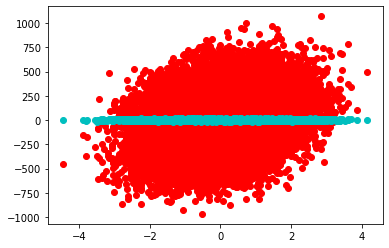

After  1000  iterations :
loss =  4781.458590849895 
 [-0.9819081  73.00713958 65.65384003 97.51924894  1.81057286 17.41933932
 25.32716294 71.35803939 30.38751738 21.27102519 93.50766879 39.73128022
 36.98975925  3.0109329  40.8763492  40.76616029 45.96700455 21.19487003
 33.81537645 33.39558523 38.81977896]
Accuracy =  84.41379109066346527 %


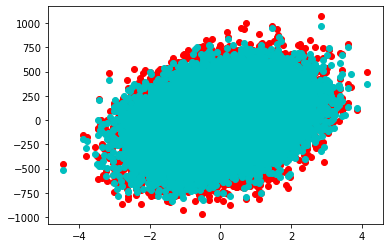

After  2000  iterations :
loss =  4781.458590849895 
 [-0.9819081  73.00713958 65.65384003 97.51924894  1.81057286 17.41933932
 25.32716294 71.35803939 30.38751738 21.27102519 93.50766879 39.73128022
 36.98975925  3.0109329  40.8763492  40.76616029 45.96700455 21.19487003
 33.81537645 33.39558523 38.81977896]
Accuracy =  84.41379109066348262 %


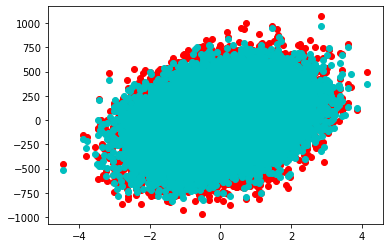

After  3000  iterations :
loss =  4781.458590849895 
 [-0.9819081  73.00713958 65.65384003 97.51924894  1.81057286 17.41933932
 25.32716294 71.35803939 30.38751738 21.27102519 93.50766879 39.73128022
 36.98975925  3.0109329  40.8763492  40.76616029 45.96700455 21.19487003
 33.81537645 33.39558523 38.81977896]
Accuracy =  84.41379109066348262 %


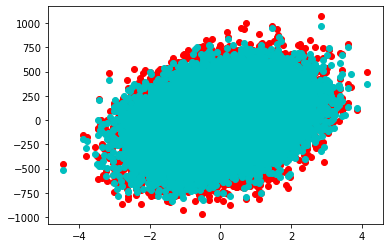

After  4000  iterations :
loss =  4781.458590849895 
 [-0.9819081  73.00713958 65.65384003 97.51924894  1.81057286 17.41933932
 25.32716294 71.35803939 30.38751738 21.27102519 93.50766879 39.73128022
 36.98975925  3.0109329  40.8763492  40.76616029 45.96700455 21.19487003
 33.81537645 33.39558523 38.81977896]
Accuracy =  84.41379109066348262 %


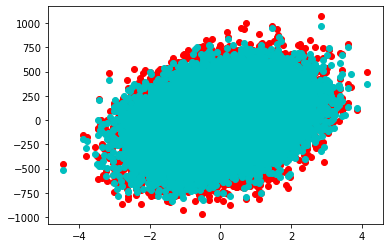

After  5000  iterations :
loss =  4781.458590849895 
 [-0.9819081  73.00713958 65.65384003 97.51924894  1.81057286 17.41933932
 25.32716294 71.35803939 30.38751738 21.27102519 93.50766879 39.73128022
 36.98975925  3.0109329  40.8763492  40.76616029 45.96700455 21.19487003
 33.81537645 33.39558523 38.81977896]
Accuracy =  84.41379109066348262 %


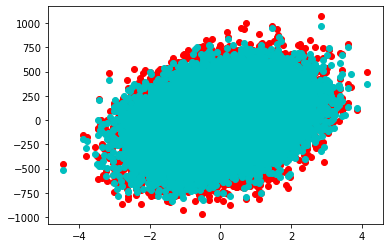

After  6000  iterations :
loss =  4781.458590849895 
 [-0.9819081  73.00713958 65.65384003 97.51924894  1.81057286 17.41933932
 25.32716294 71.35803939 30.38751738 21.27102519 93.50766879 39.73128022
 36.98975925  3.0109329  40.8763492  40.76616029 45.96700455 21.19487003
 33.81537645 33.39558523 38.81977896]
Accuracy =  84.41379109066348262 %


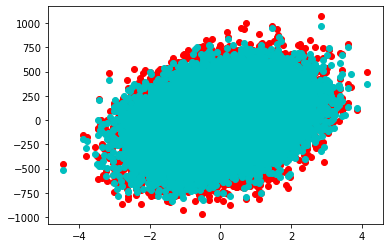

After  7000  iterations :
loss =  4781.458590849895 
 [-0.9819081  73.00713958 65.65384003 97.51924894  1.81057286 17.41933932
 25.32716294 71.35803939 30.38751738 21.27102519 93.50766879 39.73128022
 36.98975925  3.0109329  40.8763492  40.76616029 45.96700455 21.19487003
 33.81537645 33.39558523 38.81977896]
Accuracy =  84.41379109066348262 %


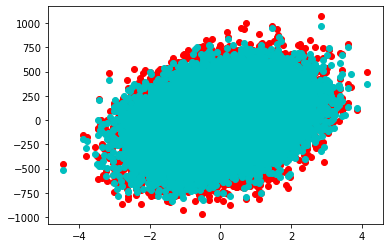

After  8000  iterations :
loss =  4781.458590849895 
 [-0.9819081  73.00713958 65.65384003 97.51924894  1.81057286 17.41933932
 25.32716294 71.35803939 30.38751738 21.27102519 93.50766879 39.73128022
 36.98975925  3.0109329  40.8763492  40.76616029 45.96700455 21.19487003
 33.81537645 33.39558523 38.81977896]
Accuracy =  84.41379109066348262 %


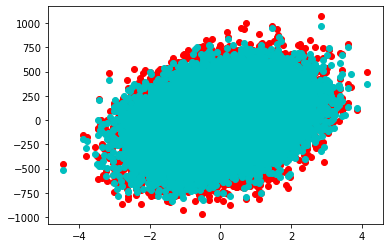

After  9000  iterations :
loss =  4781.458590849895 
 [-0.9819081  73.00713958 65.65384003 97.51924894  1.81057286 17.41933932
 25.32716294 71.35803939 30.38751738 21.27102519 93.50766879 39.73128022
 36.98975925  3.0109329  40.8763492  40.76616029 45.96700455 21.19487003
 33.81537645 33.39558523 38.81977896]
Accuracy =  84.41379109066348262 %


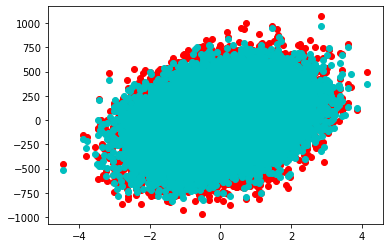

After  10000  iterations :
loss =  4781.458590849895 
 [-0.9819081  73.00713958 65.65384003 97.51924894  1.81057286 17.41933932
 25.32716294 71.35803939 30.38751738 21.27102519 93.50766879 39.73128022
 36.98975925  3.0109329  40.8763492  40.76616029 45.96700455 21.19487003
 33.81537645 33.39558523 38.81977896]
Accuracy =  84.41379109066348262 %


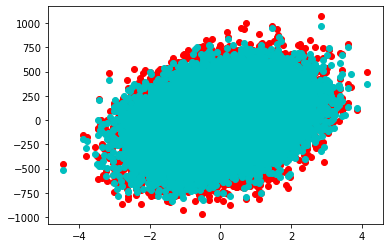

<Figure size 432x288 with 0 Axes>

In [ ]:
def ML(no_of_iterations, learning_rate, x , y , x_test , y_test):
    
  row , col = x.shape
  b = row
  np.random.seed(0)

  m = np.random.randn(col)
  # lamb = 1e-6
  # m = np.array([-3.9027444 ,  0.25549239 , 2.31655199 , 3.407514  ,  7.9776104 ,  0.60684532
  # ,1.72540239 , 2.49905173 , 1.08146542 , 0.07098634 , 3.28897969 , 1.37773031
  # ,1.3016711 ,  0.09872981 ,-0.05241565 , 3.90139145 , 1.60617904 , 0.75002665
  # ,1.18473201 , 0.23630917 , 1.37835579])
  
  for i in range(no_of_iterations+1):
  
    y_pred = np.dot(m,x.T)
    loss = (0.5/b)*np.sum((y_pred-y)**2)

    m = m - learning_rate*(np.dot(x.T, (y_pred-y)))/b  #+ lamb*(np.sum(m**2))
    
    # for element in range (0,21):
    #    xi = x[:,element]
    #    rms_xi = np.sqrt(np.sum(xi**2))
    #    m[element] = m[element] - learning_rate *np.sum((y_pred-y)*xi)/b   #x = label_train
                                                                          #y = 2D nd array of training set 
 
    if i %1000 == 0 :
        print("After ",i ," iterations :")
        print ("loss = ",loss,"\n",m)
        score = 0
        # print(x_test,m,y_test)
        # print(np.sum((x_test @ m - y_test)**2))
        # print(np.sum((y_test - np.mean(y_test))**2))
        score = R2(x_test,m,y_test)
        print("Accuracy = ",score*100,"%")
        plt.scatter(x[:,1],y,c='r')
        plt.scatter(x[:,1],y_pred,c='c')
        plt.show()
        plt.clf()
  return m
    
param = ML(no_of_iterations= 10000, learning_rate = 0.03, x = x , y = label_train , x_test = x_test ,y_test = label_test)


In [ ]:
df_test = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/ML Bootcamp data/linear_test_data.csv")
test_data = df_test.iloc[:,1:21].to_numpy()
test_data = (test_data - np.mean(X,axis=0))/np.std(X,axis = 0)
test_data = np.append(np.zeros([20000,1]),test_data,axis=1)
print(test_data.shape)
y_test = np.dot(param,test_data.T)
df_res = pd.DataFrame([ids,y_test]).T 
df_res.columns = ["Ids","Output"]
df_res.to_csv("/content/drive/MyDrive/Colab Notebooks/ML Bootcamp data/linear_regression_result.csv")

print (df_res)

(20000, 21)
           Ids      Output
0      96396.0   11.828659
1      80166.0  166.987305
2      20516.0   67.569317
3      88881.0  -99.184861
4      69115.0   28.165956
...        ...         ...
19995  59011.0  149.281747
19996  66308.0   41.262612
19997  99637.0   96.594218
19998  84616.0  307.680850
19999  66210.0 -163.128169

[20000 rows x 2 columns]


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
